In [7]:
pip install fer opencv-python tensorflow


{'box': [72, 42, 61, 75], 'emotions': {'angry': 0.02, 'disgust': 0.0, 'fear': 0.01, 'happy': 0.12, 'sad': 0.0, 'surprise': 0.01, 'neutral': 0.84}}


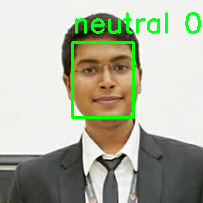

In [9]:
from fer import FER
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = "naman passport pic.png"  # Replace with your image path
image = cv2.imread(image_path)

# Initialize the detector
emotion_detector = FER(mtcnn=True)  # Using MTCNN for face detection

# Detect emotions
detected_emotions = emotion_detector.detect_emotions(image)

# Print all detected emotions with bounding box and emotion percentages
for face in detected_emotions:
    print(face)

# Draw bounding boxes on the original image
for face in detected_emotions:
    (x, y, w, h) = face["box"]
    emotions = face["emotions"]
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Annotate main emotion and its score
    top_emotion, score = emotion_detector.top_emotion(image)
    cv2.putText(image, f"{top_emotion} {score:.2f}", (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

# Display the image
cv2_imshow(image)



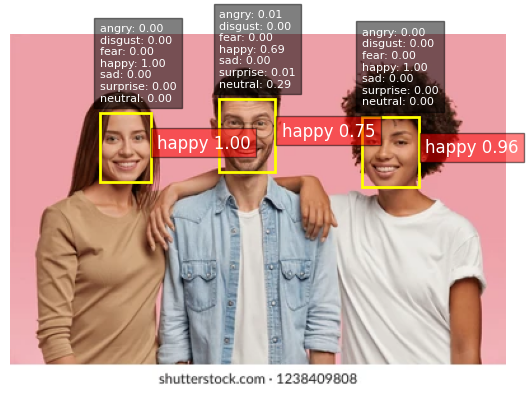

In [ ]:
from fer import FER
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the image
image_path = "group_pic.png"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# Initialize the detector
emotion_detector = FER(mtcnn=True)  # Using MTCNN for face detection

# Detect emotions
detected_emotions = emotion_detector.detect_emotions(image)

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(1)
ax.imshow(image_rgb)

# Process each face found
for face in detected_emotions:
    # Draw the bounding box as a rectangle
    (x, y, w, h) = face["box"]
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='yellow', facecolor='none')
    ax.add_patch(rect)

    # Annotate all emotions and their scores
    emotions = face["emotions"]
    text_str = "\n".join(f"{emotion}: {score:.2f}" for emotion, score in emotions.items())
    plt.text(x, y - 10, text_str, color='white', fontsize=8, bbox=dict(facecolor='black', alpha=0.5))

    # Highlight the most dominant emotion
    dominant_emotion, emotion_score = emotion_detector.top_emotion(image[y:y+h, x:x+w])
    plt.text(x + w + 5, y + h / 2, f"{dominant_emotion} {emotion_score:.2f}", color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

# Show the final result
plt.axis('off')  # Turn off axes for better visualization
plt.show()


  emotion_data = emotion_data.append(emotions, ignore_index=True)

  emotion_data = emotion_data.append(emotions, ignore_index=True)

  emotion_data = emotion_data.append(emotions, ignore_index=True)

  emotion_data = emotion_data.append(emotions, ignore_index=True)

  emotion_data = emotion_data.append(emotions, ignore_index=True)

  emotion_data = emotion_data.append(emotions, ignore_index=True)

  emotion_data = emotion_data.append(emotions, ignore_index=True)

  emotion_data = emotion_data.append(emotions, ignore_index=True)

  emotion_data = emotion_data.append(emotions, ignore_index=True)

  emotion_data = emotion_data.append(emotions, ignore_index=True)

  emotion_data = emotion_data.append(emotions, ignore_index=True)

  emotion_data = emotion_data.append(emotions, ignore_index=True)

  emotion_data = emotion_data.append(emotions, ignore_index=True)

  emotion_data = emotion_data.append(emotions, ignore_index=True)

  emotion_data = emotion_data.append(emotions, ignore_index=Tr

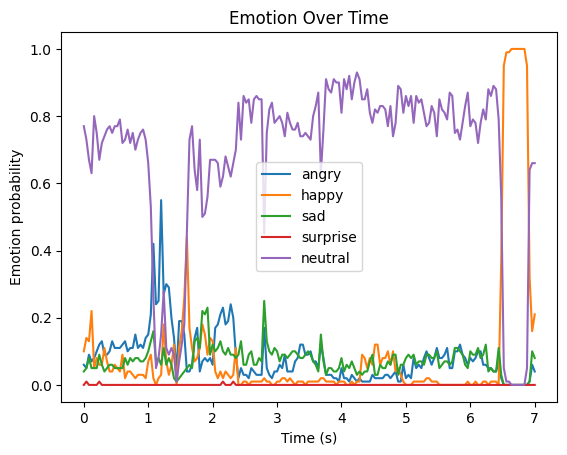

In [10]:
import cv2
import pandas as pd
from fer import FER
import matplotlib.pyplot as plt

# Initialize video capture
video_path = 'video2.mp4'
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Initialize the FER detector
emotion_detector = FER(mtcnn=True)

# Initialize the Video Writer
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output_video.avi', fourcc, fps, (int(cap.get(3)), int(cap.get(4))))

# Dataframe to store emotions
emotion_data = pd.DataFrame()

# Process video
frame_number = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Detect emotions
    detected_emotions = emotion_detector.detect_emotions(frame)

    # Write emotion data to dataframe
    for face in detected_emotions:
        emotions = face['emotions']
        emotions['frame'] = frame_number
        emotion_data = emotion_data.append(emotions, ignore_index=True)

    # Optionally annotate video
    for face in detected_emotions:
        (x, y, w, h) = face["box"]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    out.write(frame)
    frame_number += 1

# Release everything when done
cap.release()
out.release()
cv2.destroyAllWindows()

# Analyze and plot data
emotion_data['time'] = emotion_data['frame'].apply(lambda x: x / fps)
# Here you can plot specific emotions over time
for emotion in ['angry', 'happy', 'sad', 'surprise', 'neutral']:
    plt.plot(emotion_data['time'], emotion_data[emotion], label=emotion)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Emotion probability')
plt.title('Emotion Over Time')
plt.show()
